# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [22]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

*Os dados foram coletados no site http://lib.stat.cmu.edu/datasets/boston, e armazenados em arquivo excel*

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
dados = pd.read_excel("/content/drive/MyDrive/The Boston house-price data.xlsx")

dados.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2310.0,0,0.538,65750,65.2,40900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7070.0,0,0.469,64210,78.9,49671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7070.0,0,0.469,71850,61.1,49671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2180.0,0,0.458,69980,45.8,60622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2180.0,0,0.458,71470,54.2,60622,3,222.0,18.7,396.90,5.33,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    int64  
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    int64  
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11   B         506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


*O formato está adequado, tendo em vista que os dados são do tipo numérico e não há ocorrência de missings*

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [26]:
dados.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.196760,0.408844,-0.055694,0.421532,-0.220395,0.349826,-0.377747,0.629816,0.587374,0.289314,-0.387032,0.455338,-0.389137
ZN,-0.196760,1.000000,-0.534601,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.408844,-0.534601,1.000000,0.062998,0.763653,-0.391792,0.644848,-0.708304,0.595074,0.720608,0.383401,-0.356930,0.603856,-0.483908
CHAS,-0.055694,-0.042697,0.062998,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.421532,-0.516604,0.763653,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.220395,0.311991,-0.391792,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.349826,-0.569537,0.644848,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377747,0.664408,-0.708304,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.629816,-0.311948,0.595074,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.587374,-0.314563,0.720608,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


*As variáveis mais interessantes por seu caráter preditivo são "RM" e "LSTAT", que mantém as coorrelações mais fortes (0,695360 e -0,737663, respectivamente) com a variável alvo "MEDV"*

### 3. Separe os dados em validação e teste

In [27]:

X = dados.iloc[:,0:-1]
y = dados["MEDV"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.8, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [28]:
arv_1 = DecisionTreeRegressor(max_depth=2)
arv_2 = DecisionTreeRegressor(max_depth=8)

arv_1.fit(X_treino, y_treino)
arv_2.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [29]:
mse_1 = arv_1.score(X_treino, y_treino)

mse_1

0.7217742758481618

In [30]:
mse_2 = arv_2.score(X_treino, y_treino)

mse_2

0.9806499282891445

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

*A árvore arv_1 (com profundidade máxima 2) parece a mais adequada. Como modelo preditivo, este apresenta um resultado razoável e pode ser incrementado por melhorias. Enquanto a árvore arv_2 (com profundidade máxima 8), por outro lado, apresenta uma performance típica de um modelo "overfitado".*

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

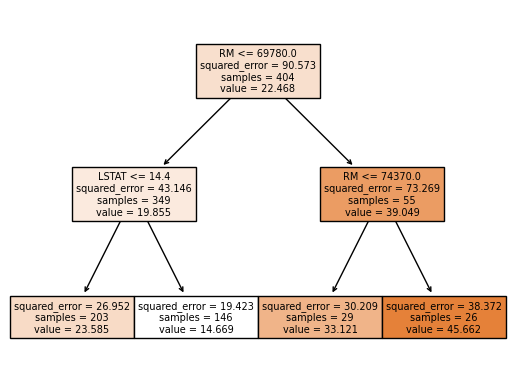

In [31]:
tp =tree.plot_tree(arv_1, feature_names=X.columns, filled=True)

*Conforme leitura do gráfico acima, a variável mais importante na árvore é "LSTAT". Embora o atributo "RM" seja utilizado no primeiro critério da árvore, a maior parte da amostra (349/404, ou 86,38%) passa pela folha cujo critério é definido pelo atributo "LSTAT", somente.*